In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

In [2]:
def show_image(img,title,ax):
        ax.imshow(img, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])

# showing the given images with titles
#   titles - title for each image
#   imgs - list of images
def show_images(titles,imgs):
    # Wavelet transform of image, and plot approximation and details
    #fig = plt.figure(figsize=(12, 3))
    fig = plt.figure(figsize=(4*len(imgs), 4))
    for i, a in enumerate(imgs):
        ax = fig.add_subplot(1, len(imgs), i + 1)
        show_image(a,titles[i],ax)
    fig.tight_layout()
    plt.show()
def show_dwt2(original_,coeffs2_):
    titles= ['Original'
            ,'Approximation'
            ,'Horizontal detail'
            ,'Vertical detail'
            ,'Diagonal detail'
            ]
    LL, (LH, HL, HH) = coeffs2_
    imgs=[original_, LL, LH, HL, HH]
    show_images(titles,imgs)
def show_wavedec2(original_,coeffs2_):
    imgs=[]
    titles=[]
    imgs.append(original_)
    titles.append('Original')
    for level in range(0,len(coeffs2_)):
        imgs.append(coeffs2_[level])
        titles.append('Coefficients\n({} level)'.format(level+1))
    show_images(titles,imgs)
def show_wavedec2_structure(maxlevel):
    cols= maxlevel+1
    fig, axes = plt.subplots(1, cols, figsize=[4*cols, 4*rows])
    for level in range(0, cols):
        if level == 0:
            # show the original image before decomposition
            axes[0].set_axis_off()
            continue

        # plot subband boundaries of a standard DWT basis
        draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[level],
                         label_levels=label_levels)
        axes[level].set_title('{} level\ndecomposition'.format(level))
def show_wavedec2_with_structure(original_,maxlevel_):
    rows= 2 # number of rows
    cols= maxlevel_+1
    fig, axes = plt.subplots(rows, cols, figsize=[4*cols, 4*rows])
    for level in range(0, cols):
        if level == 0:
            # show the original image before decomposition
            axes[0, 0].set_axis_off()
            axes[1, 0].imshow(original_, cmap=plt.cm.gray)
            axes[1, 0].set_title('Image')
            axes[1, 0].set_axis_off()
            continue

        # plot subband boundaries of a standard DWT basis
        draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                         label_levels=label_levels)
        axes[0, level].set_title('{} level\ndecomposition'.format(level))

        # compute the 2D DWT
        c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
        # normalize each coefficient array independently for better visibility
        c[0] /= np.abs(c[0]).max()
        for detail_level in range(level):
            c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
        # show the normalized coefficients
        arr, slices = pywt.coeffs_to_array(c)
        axes[1, level].imshow(arr, cmap=plt.cm.gray)
        axes[1, level].set_title('Coefficients\n({} level)'.format(level))
        axes[1, level].set_axis_off()

    plt.tight_layout()
    plt.show()

In [3]:
# Load image
original = pywt.data.camera()

In [4]:
# single layer wavelet transform
# https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#single-level-dwt2
coeffs2 = pywt.dwt2(original, 'bior1.3')

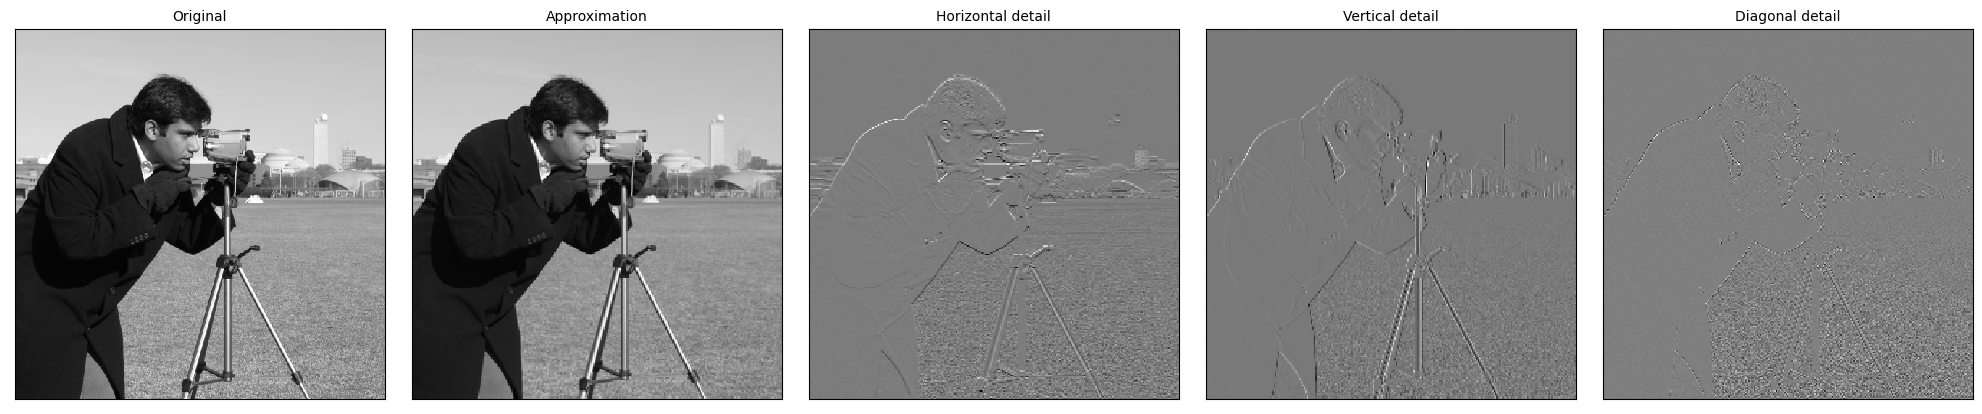

In [5]:
show_dwt2(original,coeffs2)

In [9]:
# multi-level discrete wavelet
coeffs2 = []
for level in range(1, cols):
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    coeffs2.append(arr)

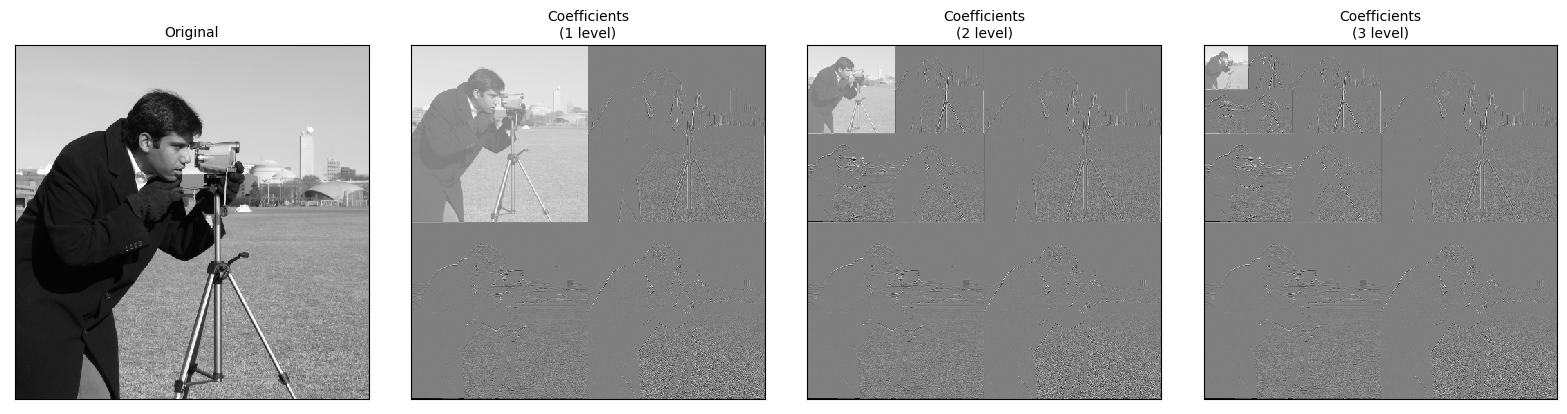

In [10]:
show_wavedec2(original,coeffs2)

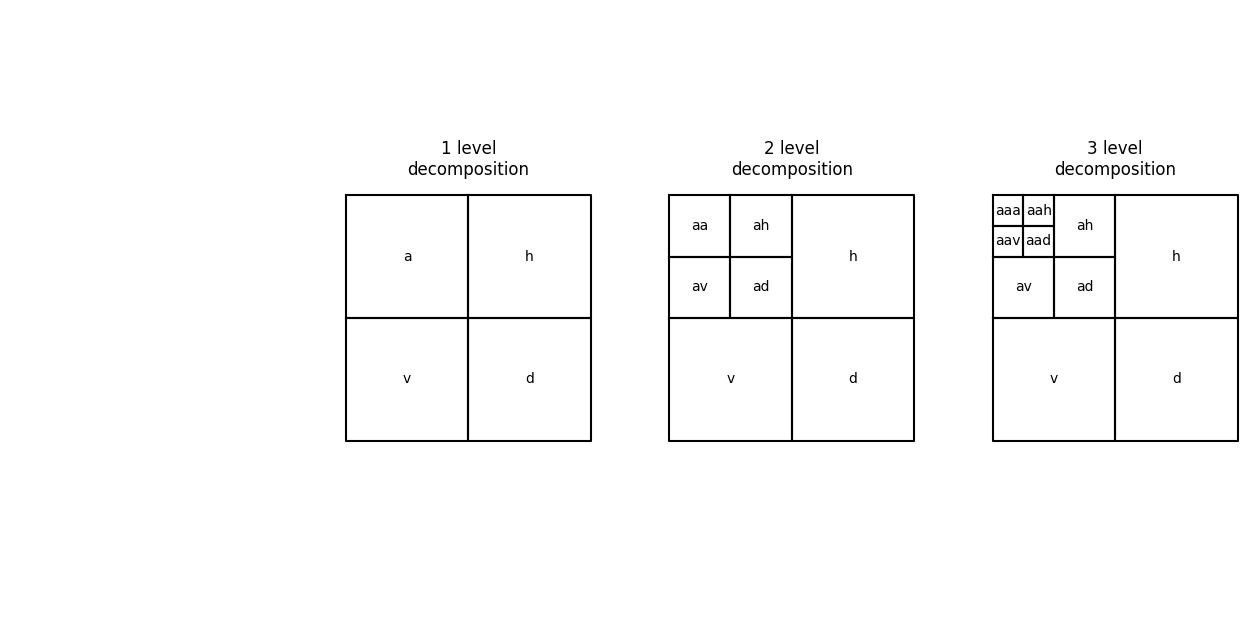

In [11]:
show_wavedec2_structure(3)

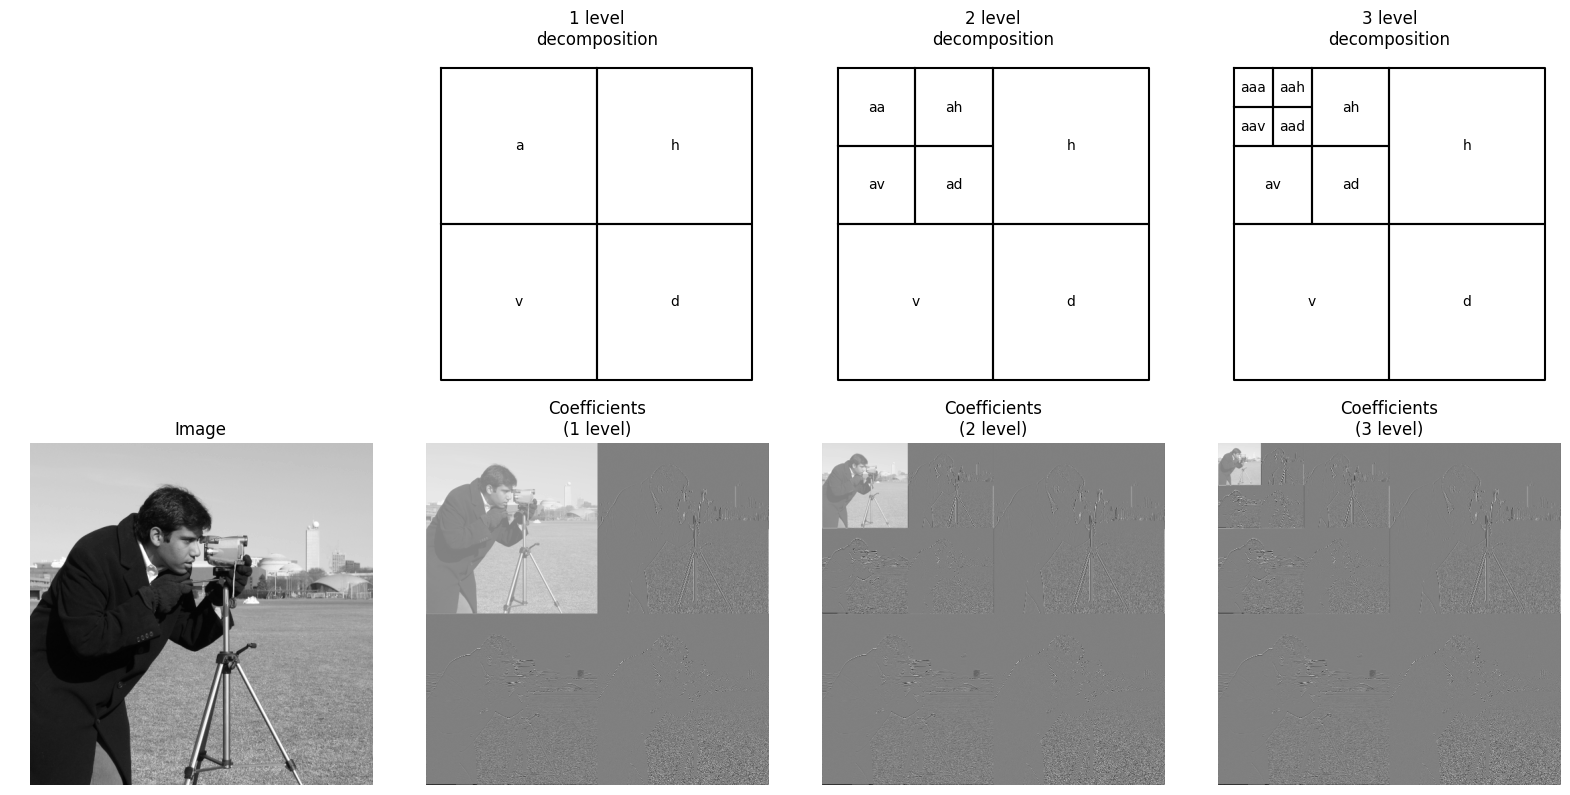

In [12]:
show_wavedec2_with_structure(original,3)